# Loading data for analysis: the `load_data` function.

`DataSet` objects are not intended to be instantiated directly, but
rather through the helper functions:
- `load_data` for existing data sets, including the data currently
  being acquired.
- `new_data` to make an empty data set to be populated with new
  measurements or simulation data. `new_data` is called internally by
  `Loop.run()` so is also generally not needed directly.

If you omit `location`, or if `location` matches the data set currently
being acquired, `load_data` and subsequent calls to `data_set.sync()`
will pull from the `DataServer` (`DataMode.PULL_FROM_SERVER`).
Otherwise `load_data` and `data_set.sync()` will read from disk
(`DataMode.LOCAL`).

Note that a `DataServer` is, at least for now, local to one parent
process / notebook, so if you open a separate notebook for analysis, even
your live data will be pulled from disk.

In [1]:
%matplotlib nbagg
import qcodes as qc
data = qc.load_data('testsweep')
data

<IPython.core.display.Javascript object>

[['<Type>', '<array_id>', '<array.name>', '<array.shape>'], ['Measured', 'meter_amplitude', 'amplitude', '(401,)'], ['Setpoint', 'gates_chan0_set', 'chan0', '(401,)']]


DataSet:
   mode     = DataMode.LOCAL
   location = 'testsweep'
   <Type>   | <array_id>      | <array.name> | <array.shape>
   Setpoint | gates_chan0_set | chan0        | (401,)
   Measured | meter_amplitude | amplitude    | (401,)

<IPython.core.display.Javascript object>


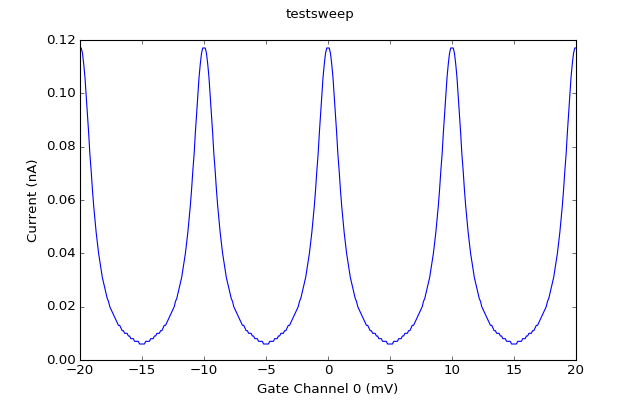

In [2]:
qc.MatPlot(data.amplitude)

In [3]:
live_data = qc.load_data()  # this will be an error because there is no live data
live_data

RuntimeError: Live data requested but DataManager does not exist or was requested not to be used